In [454]:
import numpy as np
from PIL import Image
import json
import os
import time
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [455]:
with open('result_train_ucsd.json', 'r') as f:
    D = json.load(f)
    
with open('result_test_ucsd.json', 'r') as f:
    Dtest = json.load(f)

In [456]:
psnr_train = np.load('ped2_train',allow_pickle=True)['psnr']
psnr_test = np.load('ped2_test',allow_pickle=True)['psnr']

In [457]:
def load_image_into_numpy_array(image):
    # The function supports only grayscale images
    last_axis = -1
    dim_to_repeat = 2
    repeats = 3
    grscale_img_3dims = np.expand_dims(image, last_axis)
    training_image = np.repeat(grscale_img_3dims, repeats, dim_to_repeat).astype('uint8')
    assert len(training_image.shape) == 3
    assert training_image.shape[-1] == 3
    return training_image

## Create Train Feature Space

In [458]:
Classes = list()

In [459]:
import pickle

path = np.sort(os.listdir('../Data/ped2/training/frames/'))
Train_FS = list()


count = 4
for j in range(0,16):
    Train_Vid = list()
    print(j)
    path2 = os.listdir('../Data/ped2/training/frames/'+ str(path[j]))
    for i in range(4,int(len(path2))):

        Frame_Vid = list()
        
        if (len(D[count]['objects']))!=0:
            App_flag = False
            for bound in (D[count]['objects']):
                
                if bound['confidence'] >=0.97:
                    y = bound['relative_coordinates']['center_y']*256
                    x = bound['relative_coordinates']['center_x']*256
                    h = bound['relative_coordinates']['height']*256
                    w = bound['relative_coordinates']['width']*256
                    
                    if bound['name'] not in Classes:
                        Classes.append(bound['name'])


                    mse =  1/psnr_train[j][i]
                    cx = x + w/2
                    cy = y + h/2
                    area = w*h
                    typ = bound['confidence']

                    probs = np.zeros((1,15))
                    probs[0,Classes.index(bound['name'])] = bound['confidence']
                    fs = [mse,cx,cy,area] + list(probs[0,:])
                    Train_FS.append(fs)
                    App_flag = True
                    
            
            if App_flag == False:
                
                mse =  1/psnr_train[j][i]
                cx = 0 
                cy = 0 
                area = 0
                typ = 0

                probs = np.zeros((1,15))
                fs = [mse,cx,cy,area] + list(probs[0,:])
                Train_FS.append(fs)
                
        
        else:
            
            mse =  1/psnr_train[j][i]
            cx = 0 
            cy = 0 
            area = 0
            typ = 0

            probs = np.zeros((1,15))
            fs = [mse,cx,cy,area] + list(probs[0,:])

            Train_FS.append(fs)
        count +=1

    count+=4
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [460]:
Train_FS = np.array(Train_FS)

In [461]:
### We only care about a few classes, no point detecting classes like giraffe, dogs etc.
Classes_Test = ['person', 'skateboard', 'bicycle', 'skis']

## Create Test Feature Space

In [462]:
import pickle

path = np.sort(os.listdir('../Data/ped2/testing/frames/'))
Test_FS = list()


count = 4
for j in range(0,12):
    Test_Vid = list()
    print(j)
    path2 = os.listdir('../Data/ped2/testing/frames/'+ str(path[j]))
    for i in range(4,int(len(path2))):

        Frame_Vid = list()
        
        if (len(Dtest[count]['objects']))!=0:
            App_flag = False
            for bound in (Dtest[count]['objects']):
                
                if bound['confidence'] >=0.6:
                    if bound['name'] in Classes_Test:
                        y = bound['relative_coordinates']['center_y']*256
                        x = bound['relative_coordinates']['center_x']*256
                        h = bound['relative_coordinates']['height']*256
                        w = bound['relative_coordinates']['width']*256

    #                     if bound['name'] not in Classes_Test:
    #                         Classes_Test.append(bound['name'])


                        mse =  1/psnr_test[j][i]
                        cx = x + w/2
                        cy = y + h/2
                        area = w*h


                        probs = np.zeros((1,15))
                        probs[0,Classes_Test.index(bound['name'])] = bound['confidence']
                        if Classes_Test.index(bound['name']) !=0:
                            print(j,i,Classes_Test.index(bound['name']))
                        fs = [mse,cx,cy,area] + list(probs[0,:])
                        Frame_Vid.append(fs)
                        App_flag = True
                    
            
            if App_flag == False:
                
                mse =  1/psnr_test[j][i]
                cx = 0 
                cy = 0 
                area = 0
                typ = 0

                probs = np.zeros((1,15))
                fs = [mse,cx,cy,area] + list(probs[0,:])
                
        
        else:
            
            mse =  1/psnr_test[j][i]
            cx = 0 
            cy = 0 
            area = 0
            typ = 0

            probs = np.zeros((1,15))
            fs = [mse,cx,cy,area] + list(probs[0,:])
            Frame_Vid.append(fs)
        count +=1
            
        Test_Vid.append(Frame_Vid)
        
    Test_FS.append(Test_Vid)

    count+=4
            

0
0 20 1
0 36 1
0 36 1
0 37 1
0 40 1
0 46 1
0 74 2
0 75 2
0 76 2
0 77 2
0 78 2
0 79 2
0 80 2
0 81 2
0 82 2
0 83 2
0 84 2
0 85 2
0 86 2
0 87 2
0 88 2
0 89 2
0 90 2
0 91 2
0 92 2
0 93 2
0 94 2
0 95 2
0 96 2
0 97 2
0 98 2
0 99 2
0 100 2
0 101 2
0 102 2
0 103 2
0 104 2
0 105 2
0 106 2
0 107 2
0 108 2
0 109 2
0 110 2
0 111 2
0 112 2
0 113 2
0 114 2
0 115 2
0 116 2
0 117 2
0 118 2
0 119 2
0 119 2
0 120 2
0 121 2
0 122 2
0 123 2
0 124 2
0 125 2
0 126 2
0 127 2
0 128 2
0 129 2
0 130 2
0 131 2
0 132 2
0 133 1
0 133 2
0 134 2
0 146 2
0 147 2
0 149 2
0 159 2
0 160 2
0 161 2
0 162 2
0 163 2
0 164 2
0 165 2
0 166 1
0 166 2
0 167 2
0 168 2
0 169 2
0 170 2
0 171 2
0 172 2
0 173 2
0 174 2
0 175 2
0 176 2
0 177 2
0 178 2
0 179 2
1
1 92 2
1 93 2
1 94 2
1 96 2
1 97 2
1 98 2
1 99 2
1 100 2
1 101 2
1 102 2
1 103 2
1 104 2
1 105 2
1 106 1
1 106 2
1 107 2
1 108 2
1 109 2
1 110 2
1 111 2
1 112 2
1 113 2
1 114 2
1 115 2
1 116 2
1 117 2
1 118 2
1 119 1
1 119 2
1 120 2
1 121 1
1 121 2
1 122 2
1 123 2
1 124 2
1 1

In [463]:
Classes_Test

['person', 'skateboard', 'bicycle', 'skis']

## Normalization

In [464]:
g_min = np.min(Train_FS,0)
g_max = np.max(Train_FS,0)


Train_FS_N = Train_FS*1
Test_FS_N = Test_FS*1

for i in range(0,4):
    Train_FS_N[:,i] = (Train_FS[:,i] - g_min[i])/(g_max[i]-g_min[i])

for i in range(1,4):                            
    Train_FS_N[:,i] = 0.2*(Train_FS_N[:,i])
    
for i in range(4,5):                            
    Train_FS_N[:,i] = 0*(Train_FS_N[:,i])


for i in range(len(Test_FS_N)):
    for j in range(len(Test_FS_N[i])):
        for k in range(len(Test_FS_N[i][j])):
            for m in range(0,4):
                Test_FS_N[i][j][k][m] = (Test_FS_N[i][j][k][m] - g_min[m])/(g_max[m]-g_min[m])
                    
            for m in range(1,4):
                Test_FS_N[i][j][k][m] = 0.2*(Test_FS_N[i][j][k][m])
                
            for m in range(4,5):
                Test_FS_N[i][j][k][m] = 0*(Test_FS_N[i][j][k][m])
                
            for m in range(5,18):
                if Test_FS_N[i][j][k][m] != 0:
                    (Test_FS_N[i][j][k][m]) = 0.9
        

## ODIT Training

In [465]:
import numpy.matlib
def knndis(t,X_M):
    Mg = X_M.shape[1]

    
    dist = np.sum((np.transpose(np.matlib.repmat(t,Mg,1)) - X_M)**2,0) 
    dist = np.sort(dist)
    return sum(dist[0:10])

In [466]:
def knndis_tr(t,X_M):
    Mg = X_M.shape[1]

    
    dist = np.sum((np.transpose(np.matlib.repmat(t,Mg,1)) - X_M)**2,0) 
    dist = np.sort(dist)
    return sum(dist[1:11])

In [467]:
np.random.shuffle(Train_FS_N)
Train_FS_N.shape

(8767, 19)

In [468]:
errors = list()
np.random.shuffle(Train_FS_N)
Ng = 2000
Mg = Train_FS_N.shape[0] - 2000

X_N = Train_FS_N[0:Ng]
X_M = Train_FS_N[Ng:-1]

for i in range(Ng):
    
    e = (X_N[i,0]) + knndis_tr(np.transpose(X_N[i,1:-1]),np.transpose(X_M[:,1:-1]))
    errors.append(e)
    print(i,e)
    


0 0.3998753914308594
1 0.3166307659585176
2 0.4788386854822137
3 0.33959239826084925
4 0.28921921683946306
5 0.29104926187818836
6 0.4848686648949992
7 0.30692878389159206
8 0.0971076253719787
9 0.1498669503533088
10 0.11544579102991126
11 0.3170881937488057
12 0.43180727488614007
13 0.2597710506847952
14 0.484457260310064
15 0.6977295186517314
16 0.24782536618044532
17 0.41505603059403884
18 0.06317686793429395
19 0.2479256715547199
20 0.35641173523169023
21 0.7636090750634354
22 0.12289468018081731
23 0.43486532415079737
24 0.12424706321603009
25 0.7425645728092516
26 0.8809057496573176
27 0.3492833618701711
28 0.2720725315659647
29 0.32805882067011094
30 0.3588011748138577
31 0.41275138102747133
32 0.8087262531839357
33 0.3853831766726016
34 0.03233477598410165
35 0.7537806063444465
36 0.4273416342695608
37 0.17830423709664814
38 0.21227143742452972
39 0.09962590577258766
40 0.4420367757915738
41 0.40884863284553324
42 0.8147249102730223
43 0.7259547880419399
44 0.23698510853637214


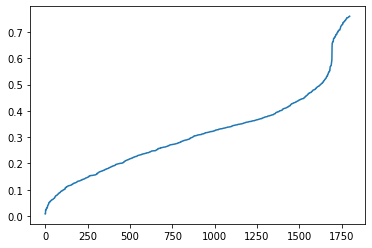

In [469]:
plt.plot(np.sort(errors)[1:1800])

In [470]:
Base_lm = np.sort(errors)[int(len(errors)*0.9)]

0.7626365301164963

## Test Section

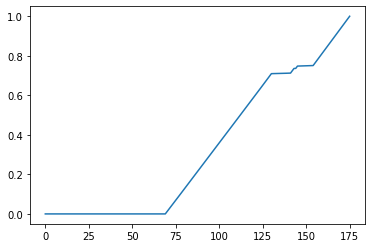

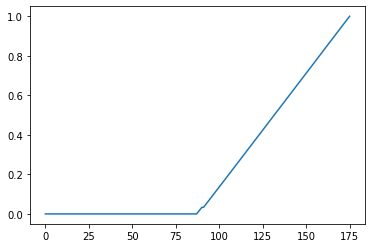

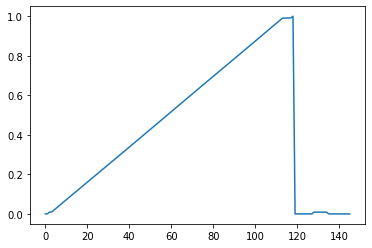

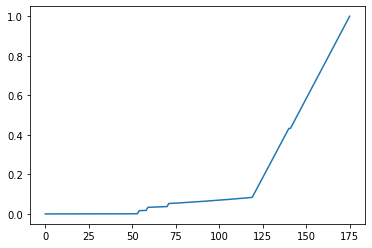

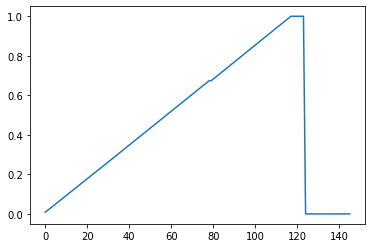

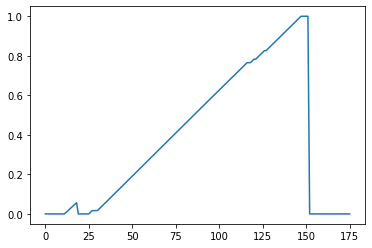

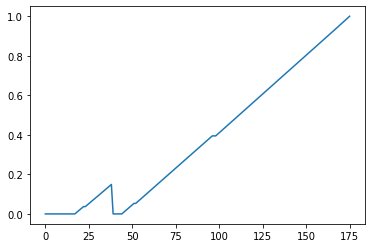

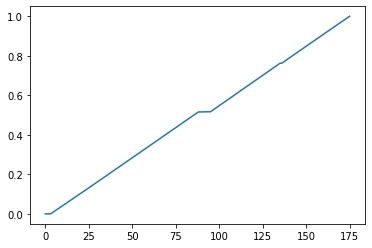

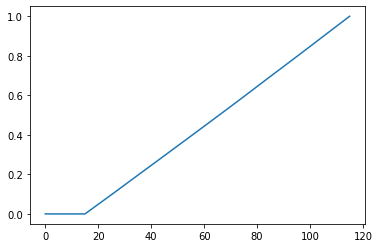

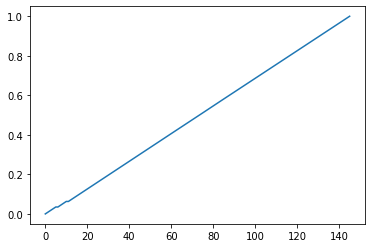

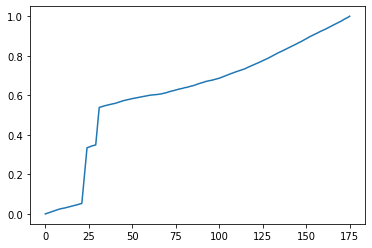

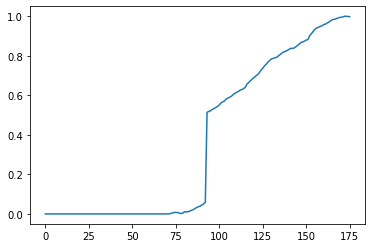

In [471]:
AV2 = list()
dis = list()
lm2 = [0.75,0.75,0.75,0.75,0.95,0.85,0.75,0.75,0.75,0.75,0.75,0.75] # This is computed per video by using the base lm and computing the mean and variance for each video.
for v in range(0,12):
    vid = [0]
    for i in range(0,len(Test_FS_N[v])):
        t = list()
        if (len(Test_FS_N[v][i])) != 0:
            for j in range(0,len(Test_FS_N[v][i])):
                t.append(Test_FS_N[v][i][j][0] + knndis(np.transpose(Test_FS_N[v][i][j][1:]),np.transpose(Train_FS_N[:,1:])))
            d = (np.max(t)) - (lm2[v]) #For global normalization, substitute lm2[v] with 0.8
            dis.append(d)
            vid.append(np.max((0,vid[i] +d)))
            if i > 5:
                if vid[i+1] - vid[i] <=0:
                    if vid[i] - vid[i-1] <=0:
                        if vid[i-1] - vid[i-2] <=0:
                            vid[i+1] = 0
            
            
                    
            
    vid.pop(0)
    idx = np.where(np.array(vid)>0)[0]

    for id1 in range(0,len(idx)-6):
        if idx[id1+6] - idx[id1] >= 10:
            vid[idx[id1]] = 0
    
    for id2 in range(0,len(idx)-50):
        if idx[id2+50] - idx[id2] >= 54:
            vid[idx[id2]] = 0
            
    for id1 in range(0,len(idx)-6):
        if idx[id1+5] - idx[id1] >= 6:
            vid[idx[id1]] = 0
            
    
    plt.plot((vid-np.min(vid))/(np.max(vid)-np.min(vid)))
    plt.show()
    AV2.append((vid-np.min(vid))/(np.max(vid)-np.min(vid)))

In [472]:
sc = [item for sublist in AV2 for item in sublist]

In [475]:
from sklearn import metrics
import scipy.io as scio

labels = np.load('labels.npy')
fpr2, tpr2, thresholds = metrics.roc_curve(labels,sc ,1)
fpr2 = np.sort(np.append(fpr2,(0.45))) # We extrapolate a point so as to complete the ROC curve
tpr2 = np.sort(np.append(tpr2,(1)))

print('ODIT AUC:', metrics.auc(fpr2, tpr2))

np.savetxt('fpr1.csv',fpr)
np.savetxt('tpr1.csv',tpr)
np.savetxt('fpr2.csv',fpr2)
np.savetxt('tpr2.csv',tpr2)

ODIT AUC: 0.9771596816114361
